# Bank Credit Card Service Churn Analysis

In this notebook, I will perform exploratory data analysis (EDA). The main objective here is to uncover insights that will give us valuable information about churners’ patterns within the available features. it will be possible to help the bank with some churners profiles and tendencies. Furthermore, I will approach these steps in detail below, explaining why I am making each decision.

1. Business problem
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them how likely is a customer to churn so they can proactively go to the customers to provide them better services and turn customers’ decisions in the opposite direction.

1.1 What is the context?

When a bank acquires a customer for its credit card service, three essential Key Performance Indicators (KPIs) to consider include:

1. Customer Acquisition Cost (CAC): This measures the expenses associated with acquiring each credit card customer, encompassing marketing, sales, and related costs. Lower CAC reflects efficient customer acquisition.

2. Customer Lifetime Value (CLV): CLV estimates the total revenue the bank can expect to generate from a credit card customer over their relationship. A higher CLV indicates that the customer’s value surpasses the acquisition cost, ensuring long-term profitability.

3. Churn Rate: Churn rate is typically expressed as a percentage and represents the number of credit card customers who have left during a specific period divided by the total number of customers at the beginning of that period.

These KPIs help the bank assess the effectiveness of its strategies in acquiring credit card customers and gauge the potential long-term financial benefit of these acquisitions.

In order to maximize profitability, the bank aims to minimize CAC and Churn while maximizing CLV.

Which are the project objectives?

1. Identify the factors associated with customer churn.

2. Offer action plans for the bank to reduce credit card customer churn.

Which are the benefits?

1. Cost Savings

2. Improved Customer Retention

3. Enhanced Customer Experience

4. Targeted Marketing

5. Revenue Protection

And as a result, the mentioned business problem will be resolved.

!pip install pandas
!pip install numpy


In [ ]:
!pip install matplotlib
!pip install seaborn


In [132]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

### Visualization Settings
%matplotlib inline

mpl.style.use('ggplot') 

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# Palette Setting
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33']
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(0.00784313725490196, 0.18823529411764706, 0.2784313725490196),
 (0.9098039215686274, 0.36470588235294116, 0.01568627450980392),
 (0.0, 0.4666666666666667, 0.7137254901960784),
 (1.0, 0.5098039215686274, 0.0),
 (0.0, 0.5882352941176471, 0.7803921568627451),
 (1.0, 0.611764705882353, 0.2)]

The dataset was collected from kaggle: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?sort=votes

In [133]:
df=pd.read_csv('BankChurners.csv')

In [134]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]


### Data dictionary

**1. CLIENTNUM:**  Client number. Unique identifier for the customer holding the account. Categorical nominal.  
**2. Attrition_Flag:**  Internal event (customer activity) variable - if the account is closed then 1 else 0. Categorical binary.  
**3. Customer_Age:**  Demographic variable - Customer's Age in Years. Numerical discrete.  
**4. Gender:**  Demographic variable - M=Male, F=Female. Categorical nominal.  
**5. Dependent_count:**  Demographic variable - Number of dependents. Numerical discrete.  
**6. Education_Level:**  Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.). Categorical ordinal.  
**7. Marital_Status:**  Demographic variable - Married, Single, Divorced, Unknown. Categorical nominal.  
**8. Income_Category:**  Demographic variable - Annual Income Category of the account holder (<  40K - 60K,  80K,  120K, >.). Categorical ordinal.  
**9. Card_Category:**  Product Variable - Type of Card (Blue, Silver, Gold, Platinum). Categorical ordinal.  
**10. Months_on_book:**  Period of relationship with bank. Numerical discrete.  
**11. Total_Relationship_Count:**  Total no. of products held by the customer. Numerical discrete.  
**12. Months_Inactive_12_mon:**  No. of months inactive in the last 12 months. Numerical discrete.  
**13. Contacts_Count_12_mon:**  No. of Contacts in the last 12 months. Numerical discrete.  
**14. Credit_Limit:**  Credit Limit on the Credit Card. Numerical continuous.  
**15. Total_Revolving_Bal:**  Total Revolving Balance on the Credit Card. Numerical discrete.  
**16. Avg_Open_To_Buy:**  Open to Buy Credit Line (Average of last 12 months). Numerical continuous.  
**17. Total_Amt_Chng_Q4_Q1:**  Change in Transaction Amount (Q4 over Q1). Numerical continuous.  
**18. Total_Trans_Amt:**  Total Transaction Amount (Last 12 months). Numerical discrete.  
**19. Total_Trans_Ct:**  Total Transaction Count (Last 12 months). Numerical discrete.  
**20. Total_Ct_Chng_Q4_Q1:**  Change in Transaction Count (Q4 over Q1). Numerical continuous.  
**21. Avg_Utilization_Ratio:**  Average Card Utilization Ratio. Numerical continuous.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [136]:
df.shape

(10127, 21)

In [137]:
df.describe().T


count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01


Some insights:

1.  The average age is approximately 46 years. Half the customers are from 41 to 52 years old, indicating an older profile.
2.  On average, customers held approximately 4 products of the bank.
3.  75% of the customers spent at least 2 months inactive in the last 12 months. This is a bad indicator. The bank must plan strategies to improve its clients consumption.
4.  75% of the customers contacted the bank at least 2 times in the last 12 months. This is also bad, something in the credit card product is leading customers to contact the company, probably unsatisfied.
5.  The average credit limit is 8,632. Moreover, it seems to be skewed to the right (mean is greater than median, minimum credit limit is 1,438, while maximum is 34,516).
6.  The average utilization ratio is about 28%. This is a low value. Moreover, half the customers present a utilization ratio up to 17.6%. The bank must pay attention to it and try to increase the utilization of its credit card service.
7.  On average, customers made approximately 65 transactions in the last 12 months. This indicates that customers made about 5.4 transactions per month in a year, which is very low.
8.  Moreover, observing the minimum and maximum values, seems there are no inconsistent values.

Looking at missing ad duplicated values.

In [138]:
df.isna().sum()


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [139]:
df.duplicated().sum()


np.int64(0)


There are no missing or duplicated values.

-   I will drop the CLIENTNUM variable because it has an unique value for each record, not being useful for the analysis.
-   I will rename the columns in a standard format in order to turn the data manipulation easier. Moreover, attrition_flag will be renamed as churn_flag for interpretation purposes.
-   I will express Gender and Attrition_Flag variables as binary. This will make eda easier, like when looking at percentual values.

In [140]:
df.drop(columns=['CLIENTNUM'], inplace=True)

In [141]:
df.columns = [x.lower() for x in df.columns]

In [142]:
df['gender'] = df['gender'].map({'M': 1, 'F': 0})
df['attrition_flag'] = df['attrition_flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

In [143]:
df.rename(columns={'attrition_flag': 'churn_flag'}, inplace=True)

In [144]:
df.head()


churn_flag  customer_age  gender  dependent_count education_level  \
0           0            45       1                3     High School   
1           0            49       0                5        Graduate   
2           0            51       1                3        Graduate   
3           0            40       0                4     High School   
4           0            40       1                3      Uneducated   

  marital_status income_category card_category  months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   total_relationship_count  months_inactive_12_mon  contacts_count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   credit_limit  total_revolving_bal  avg_open_to_buy  total_amt_chng_q4_q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   total_trans_amt  total_trans_ct  total_ct_chng_q4_q1  avg_utilization_ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000


# Exploratory data analysis

I will explore the training set in order to get a better undestanding of how the features are individually distributed, the relashionships between them, correlations, trends and possible insights from the data, especially regard to the target variable (churn_flag). Thus, I will do univariate, bivariate and multivariate analysis of the data.

In [145]:
numerical_features = df.select_dtypes('number').columns.tolist()
categorical_features = df.select_dtypes('object').columns.tolist()
target = 'churn_flag'

print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)} categorical features. They are: ')
print(categorical_features)
print(f'\nThe target feature is: {target}.')

There are 16 numerical features. They are: 
['churn_flag', 'customer_age', 'gender', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']

There are 4 categorical features. They are: 
['education_level', 'marital_status', 'income_category', 'card_category']

The target feature is: churn_flag.


In [146]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {df[feature].nunique()} unique values. They are: ')
    print(df[feature].value_counts(normalize=True))
    print()

education_level
----------------------------------------
There are 7 unique values. They are: 
education_level
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: proportion, dtype: float64

marital_status
----------------------------------------
There are 4 unique values. They are: 
marital_status
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: proportion, dtype: float64

income_category
----------------------------------------
There are 6 unique values. They are: 
income_category
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: proportion, dtype: float64

card_category
----------------------------------------
There are 4 unique values. They are: 
card_category
Blue        0.931767
Silver     

### Univariate analysis

I will do univariate analysis below in order to see which are the typical values of each feature for the bank's customers.

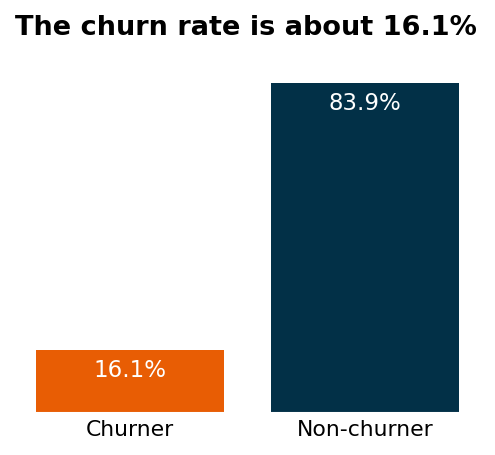

In [147]:
# Group the data by churn flag.
churn_grp = df.groupby(['churn_flag'])[['churn_flag']].count().rename(columns={'churn_flag': 'count'}).reset_index()
churn_grp['pct'] = (churn_grp['count'] / churn_grp['count'].sum()) * 100
churn_grp = churn_grp.sort_values(by=['pct'])

# Define the plot.
fig, ax = plt.subplots(figsize=(4, 3))
        
# Plot the barplot.
bars = ax.bar(x=churn_grp['churn_flag'], height=churn_grp['pct'], color=['#e85d04', '#023047'])
        
# Customize the plot.
ax.set_title('The churn rate is about 16.1%', fontweight='bold', fontsize=13, pad=15, loc='left')
ax.set_xlabel('')
ax.set_xticks(ticks=range(2), labels=['Non-churner', 'Churner'], fontsize=10.5)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.invert_xaxis()
        
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.1f}%'.format(height), 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -10),  
                textcoords="offset points",
                ha='center', va='center',
                fontsize=11, color='white')


### Numerical features distributions

I will look at numerical features distributions below in order to see if there are skewed distributions and which are the most common values for the bank's customers numeric attributes.

In [148]:
numplots_features = ['customer_age', 
                     'months_on_book', 
                     'credit_limit', 
                     'total_revolving_bal', 
                     'avg_open_to_buy', 
                     'total_amt_chng_q4_q1', 
                     'total_trans_amt', 
                     'total_trans_ct', 
                     'total_ct_chng_q4_q1', 
                     'avg_utilization_ratio',
                     'total_relationship_count']

In [176]:
def analysis_plots(
    data,
    features,
    kde=True,
    histplot=False,
    barplot=False,
    boxplot=False,
    outliers=False,
    hue=None,
    boxplot_x=None,
    text_y=None,
    figsize=(24, 20)
):
    n = len(features)
    cols = 3
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]

                # BAR PLOT (categorical) — NO hue
        if barplot:
            total = len(data)
        
            sns.countplot(
                data=data,
                x=feature,
                ax=ax
            )
        
            for p in ax.patches:
                height = p.get_height()
                if height > 0:
                    percentage = (height / total) * 100
                    ax.text(
                        p.get_x() + p.get_width() / 2,
                        height + total * 0.01,
                        f"{percentage:.1f}%",
                        ha="center",
                        va="bottom",
                        fontsize=10
                    )
        
            ax.set_title(feature)



        # BOXPLOT (feature vs target)
        elif boxplot:
            sns.boxplot(
                data=data,
                x=boxplot_x,
                y=feature,
                ax=ax
            )
            ax.set_title(f"{feature} vs {boxplot_x}")

        # OUTLIER VIEW (boxplot, no target)
        elif outliers:
            sns.boxplot(y=data[feature], ax=ax)
            ax.set_title(f"{feature} (outliers)")

        # HISTOGRAM / KDE
        else:
            sns.histplot(
                data=data,
                x=feature,
                hue=hue,
                kde=kde,
                ax=ax
            )
            ax.set_title(feature)

    # remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


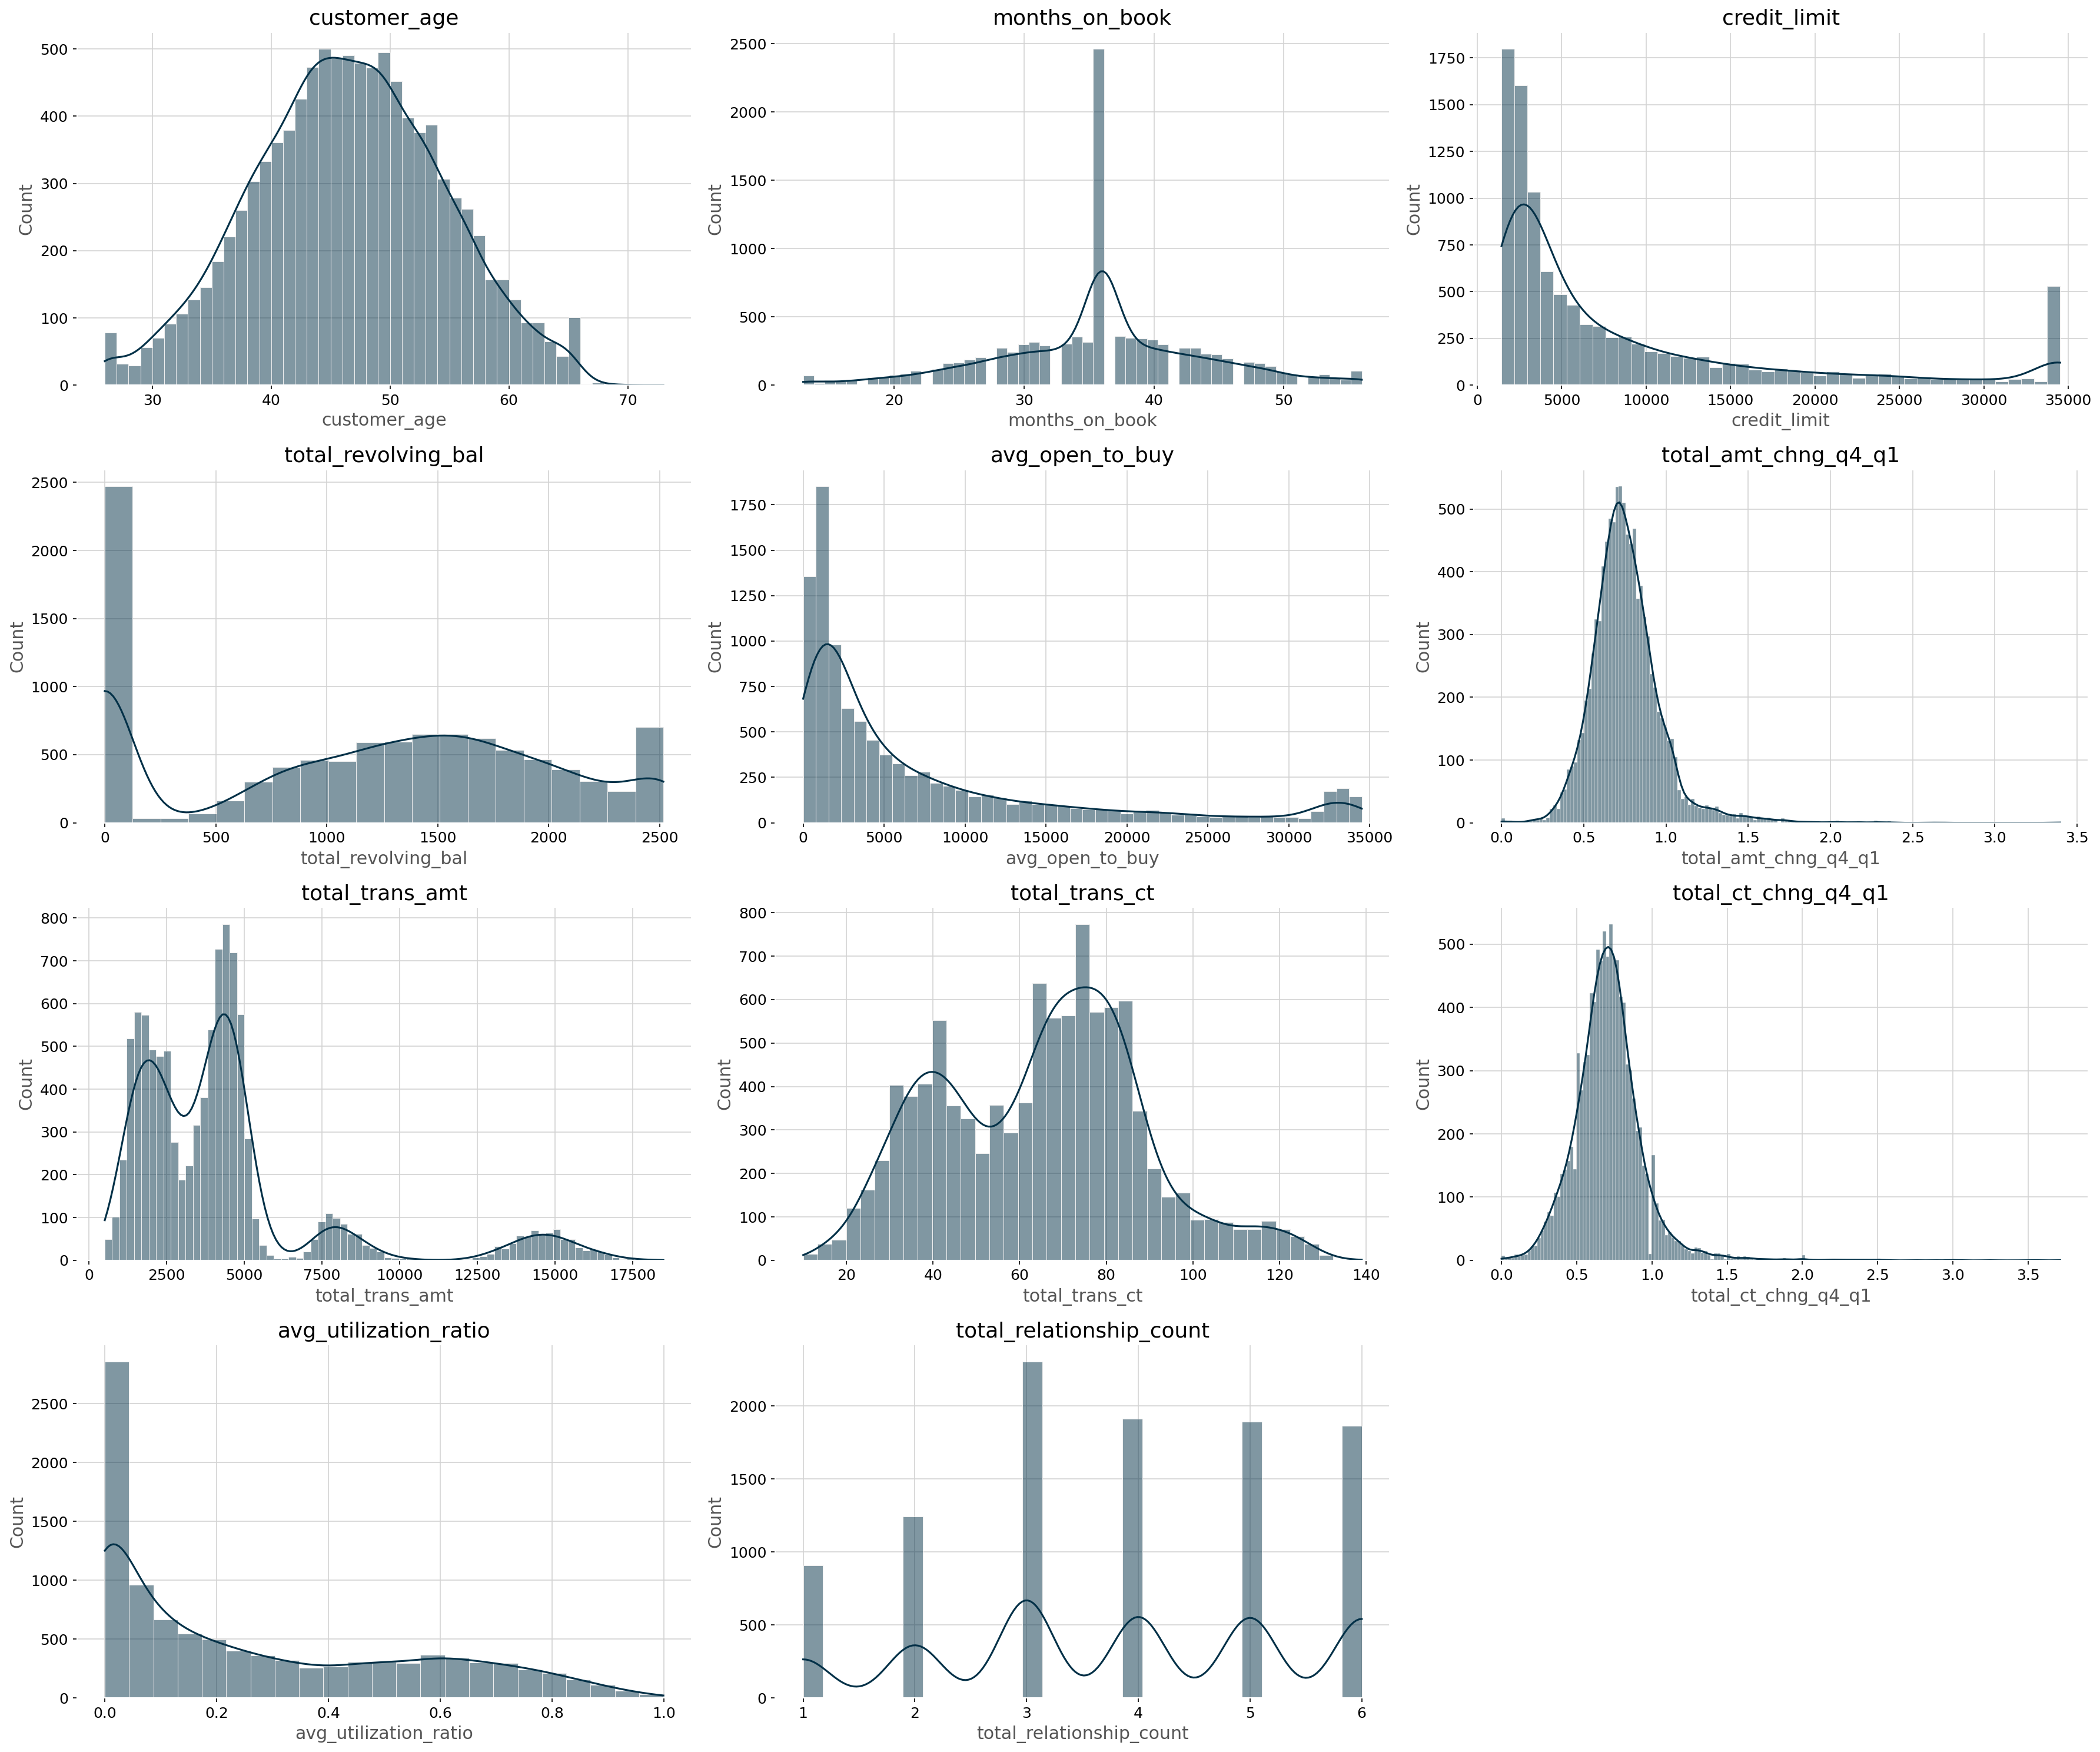

In [162]:
analysis_plots(
    data=df,
    features=numplots_features,
    kde=True,
    figsize=(24, 20)
)



-   Most of the customers are between 40 and 50 years old.
-   A large part of the customers spent 36 months consuming the bank's credit card services.
-   The credit limit is right-skewed. This means that the majority of customers have low credit limits, while there are relatively few customers with high credit limits. However, it is possible to see that a significant portion of them, about 5%, has a high credit limit, around 35,000. Moreover, both avg_open_to_buy and avg_utilization_ratio are also positively skewed.
-   The bank must be alert to the distribution of the average utilization ratio. Being right-skewed means that most customers have a low utilization of the service. Particularly, a large part of them, about 25%, present zero utilization ratio. Therefore, the company must plan strategies to increase utilization and, consequently, revenue.
-   A large portion of the customers, also about 25%, have a zero total revolving balance. Lower total revolving balances (specially zero) might indicate a significant likelihood of churn. Considering average utilization ratio and total revolving balance present the same proportion of zero records, these variables might be correlated. I will investigate this further in the analysis.
-   Total transaction count and amount distributions seem to have two peaks. There must be a distinction in these distributions with respect to churn flag, which I will investigate further in the analysis. Moreover, a large part of the customers made around 80 or 40 transactions in the last 12 months. Transaction amounts about 5,000 and 2,500 were common.
-   About 80% of the customers held at least 3 products of the bank.

### Outliers

I will look at outliers in the data in order to see if they represent inconsistent information like measurement errors. Once I do this, I will decide if I will treat them or not. Moreover, I will plot boxplots below for visualization purposes.

In [163]:
def check_outliers(data, features):
    outlier_indexes = {}
    outlier_counts = {}
    total_outliers = 0
    n_rows = data.shape[0]

    for col in features:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        indexes = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index

        count = len(indexes)
        outlier_indexes[col] = indexes.tolist()
        outlier_counts[col] = count
        total_outliers += count

    print(f"There are {total_outliers} outliers in the dataset.\n")
    print("Number (percentage) of outliers per feature:\n")

    for col, count in outlier_counts.items():
        percentage = round((count / n_rows) * 100, 2)
        print(f"{col}: {count} ({percentage}%)")

    return outlier_indexes, outlier_counts, total_outliers


In [164]:
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=df, features=numplots_features)

There are 4023 outliers in the dataset.

Number (percentage) of outliers per feature:

customer_age: 2 (0.02%)
months_on_book: 386 (3.81%)
credit_limit: 984 (9.72%)
total_revolving_bal: 0 (0.0%)
avg_open_to_buy: 963 (9.51%)
total_amt_chng_q4_q1: 396 (3.91%)
total_trans_amt: 896 (8.85%)
total_trans_ct: 2 (0.02%)
total_ct_chng_q4_q1: 394 (3.89%)
avg_utilization_ratio: 0 (0.0%)
total_relationship_count: 0 (0.0%)


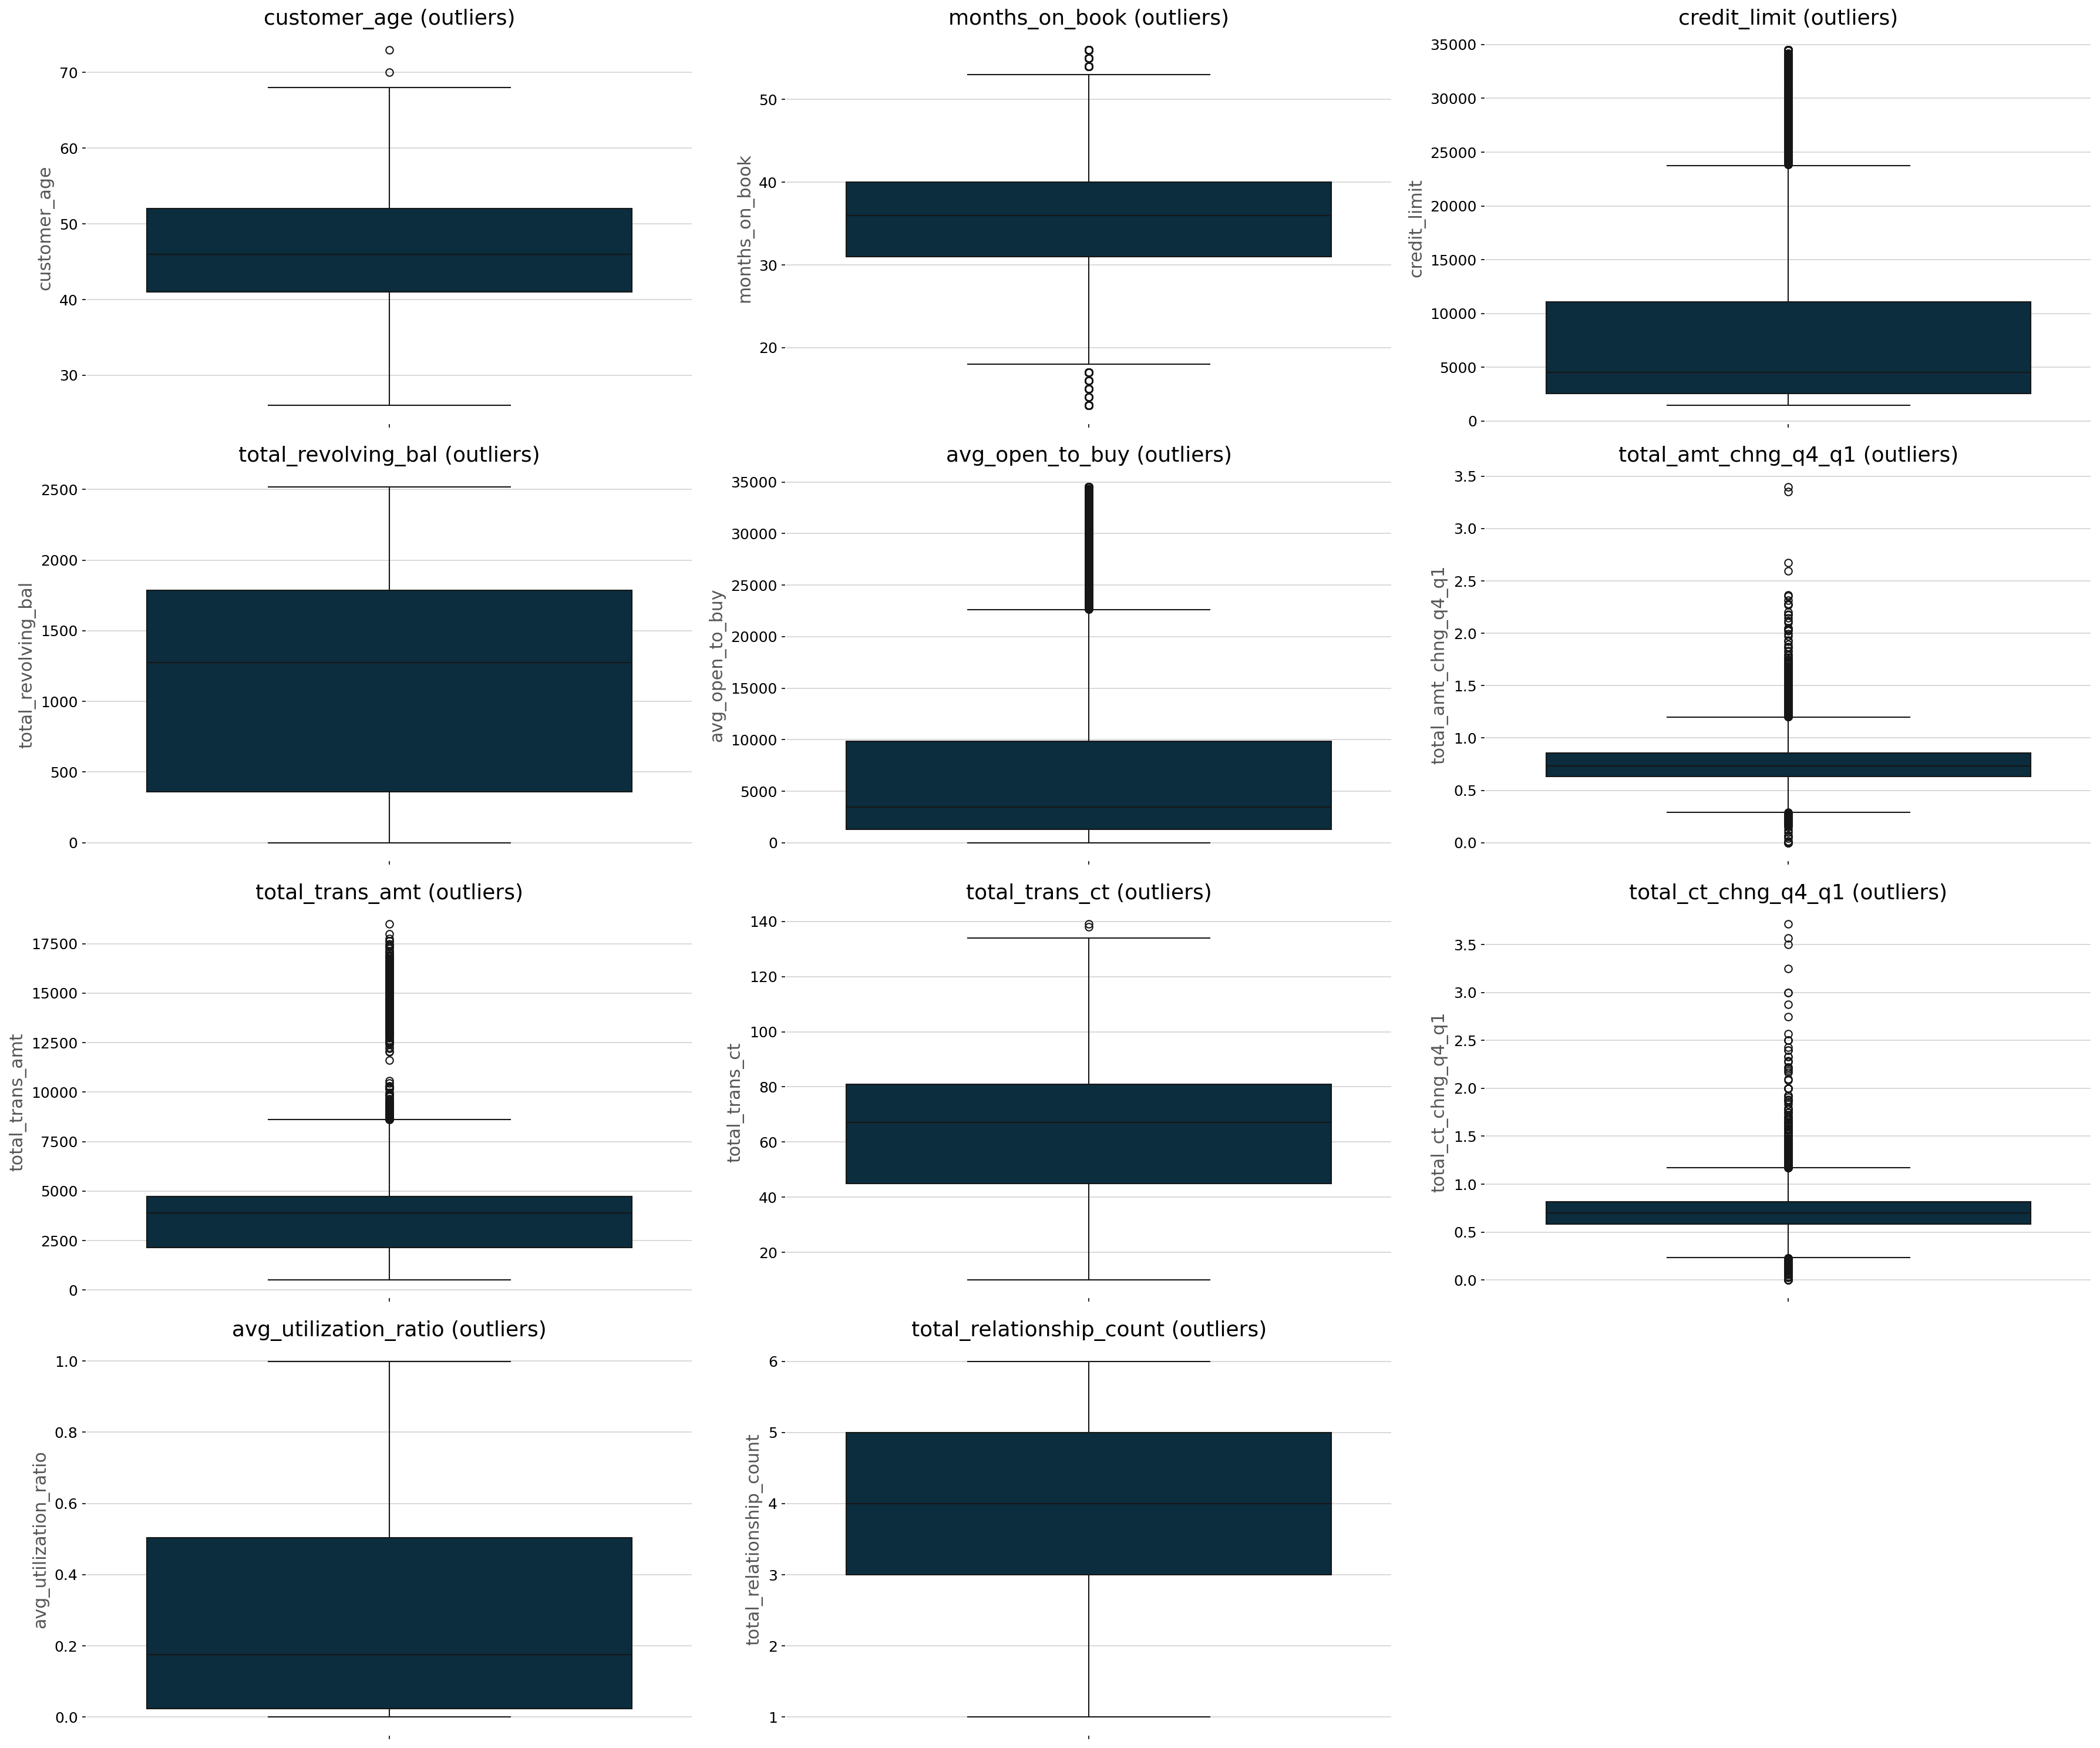

In [165]:
analysis_plots(data=df, features=numplots_features, outliers=True)


### Categorical features distributions

I will look at categorical features distributions below in order to assess which are the most common characteristics of the bank's customers. Moreover, I will include some discrete variables in these plots because it will be easier to visualize them in a countplot.

In [177]:
barplot_discrete_features = ['gender', 
                             'dependent_count', 
                             'months_inactive_12_mon', 
                             'contacts_count_12_mon']
barplot_features = barplot_discrete_features + categorical_features

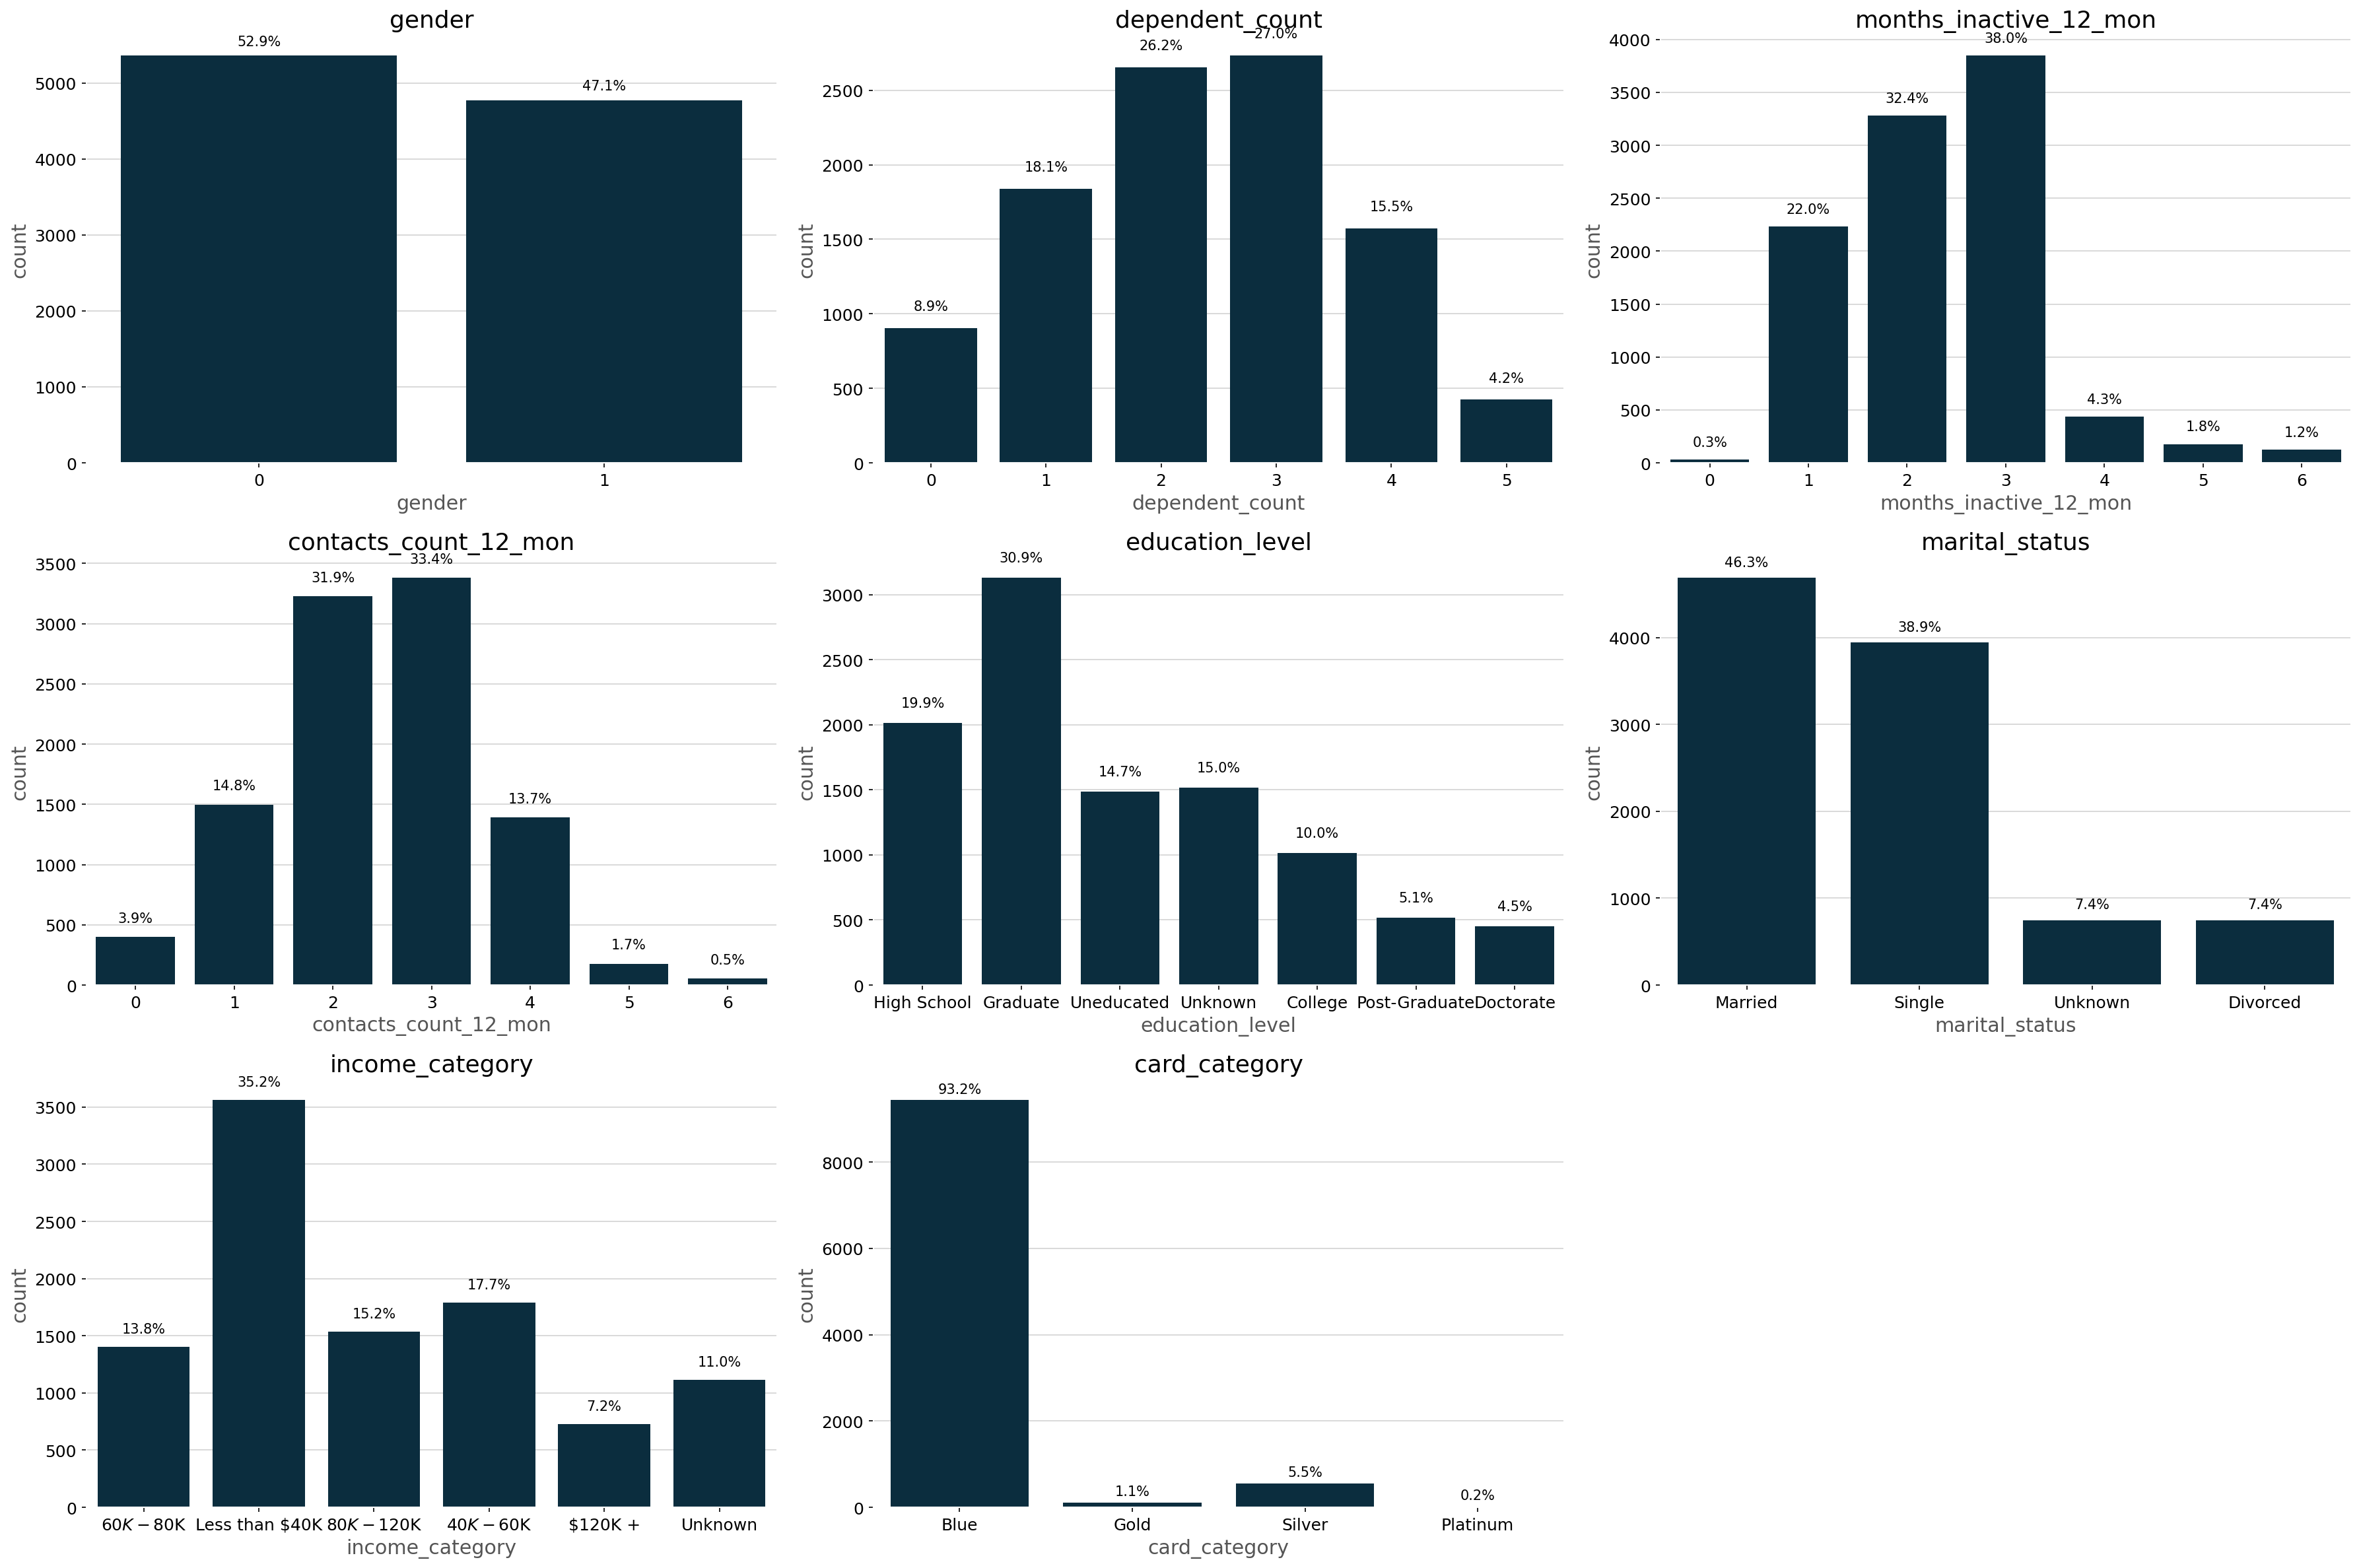

In [178]:
analysis_plots(data=df, features=barplot_features, barplot=True, figsize=(24, 16))


Insights:

-   Almost 53% of the customers are female.
-   More than 50% of the customers have 2 or 3 dependents.
-   90% of the customers were inactive from 1 to 3 months in the last year. The bank must plan strategies not only to increase the utilization ratio, but also to avoid customer inactivity.
-   Most of the customers (approximately 65% of them) contacted the bank 2 or 3 times in the last 12 months.
-   Most of the customers are married or single, graduate, make less than $40K and hold a blue credit card.



### Bivariate and multivariate analysis

I will do bivariate and multivariate analysis below in order to see how the features are related to each other, particularly with the target variable (churn_flag).

### Correlation matrix

I will examine the correlation matrix in order to identify any linear relationships between the features in the data, particularly with the target variable, and assess the strength and direction of these relationships.

In [168]:
corr_matrix = df.corr(numeric_only=True)

In [169]:
corr_matrix['churn_flag'].sort_values(ascending=False)

churn_flag                  1.000000
contacts_count_12_mon       0.204491
months_inactive_12_mon      0.152449
dependent_count             0.018991
customer_age                0.018203
months_on_book              0.013687
avg_open_to_buy            -0.000285
credit_limit               -0.023873
gender                     -0.037272
total_amt_chng_q4_q1       -0.131063
total_relationship_count   -0.150005
total_trans_amt            -0.168598
avg_utilization_ratio      -0.178410
total_revolving_bal        -0.263053
total_ct_chng_q4_q1        -0.290054
total_trans_ct             -0.371403
Name: churn_flag, dtype: float64

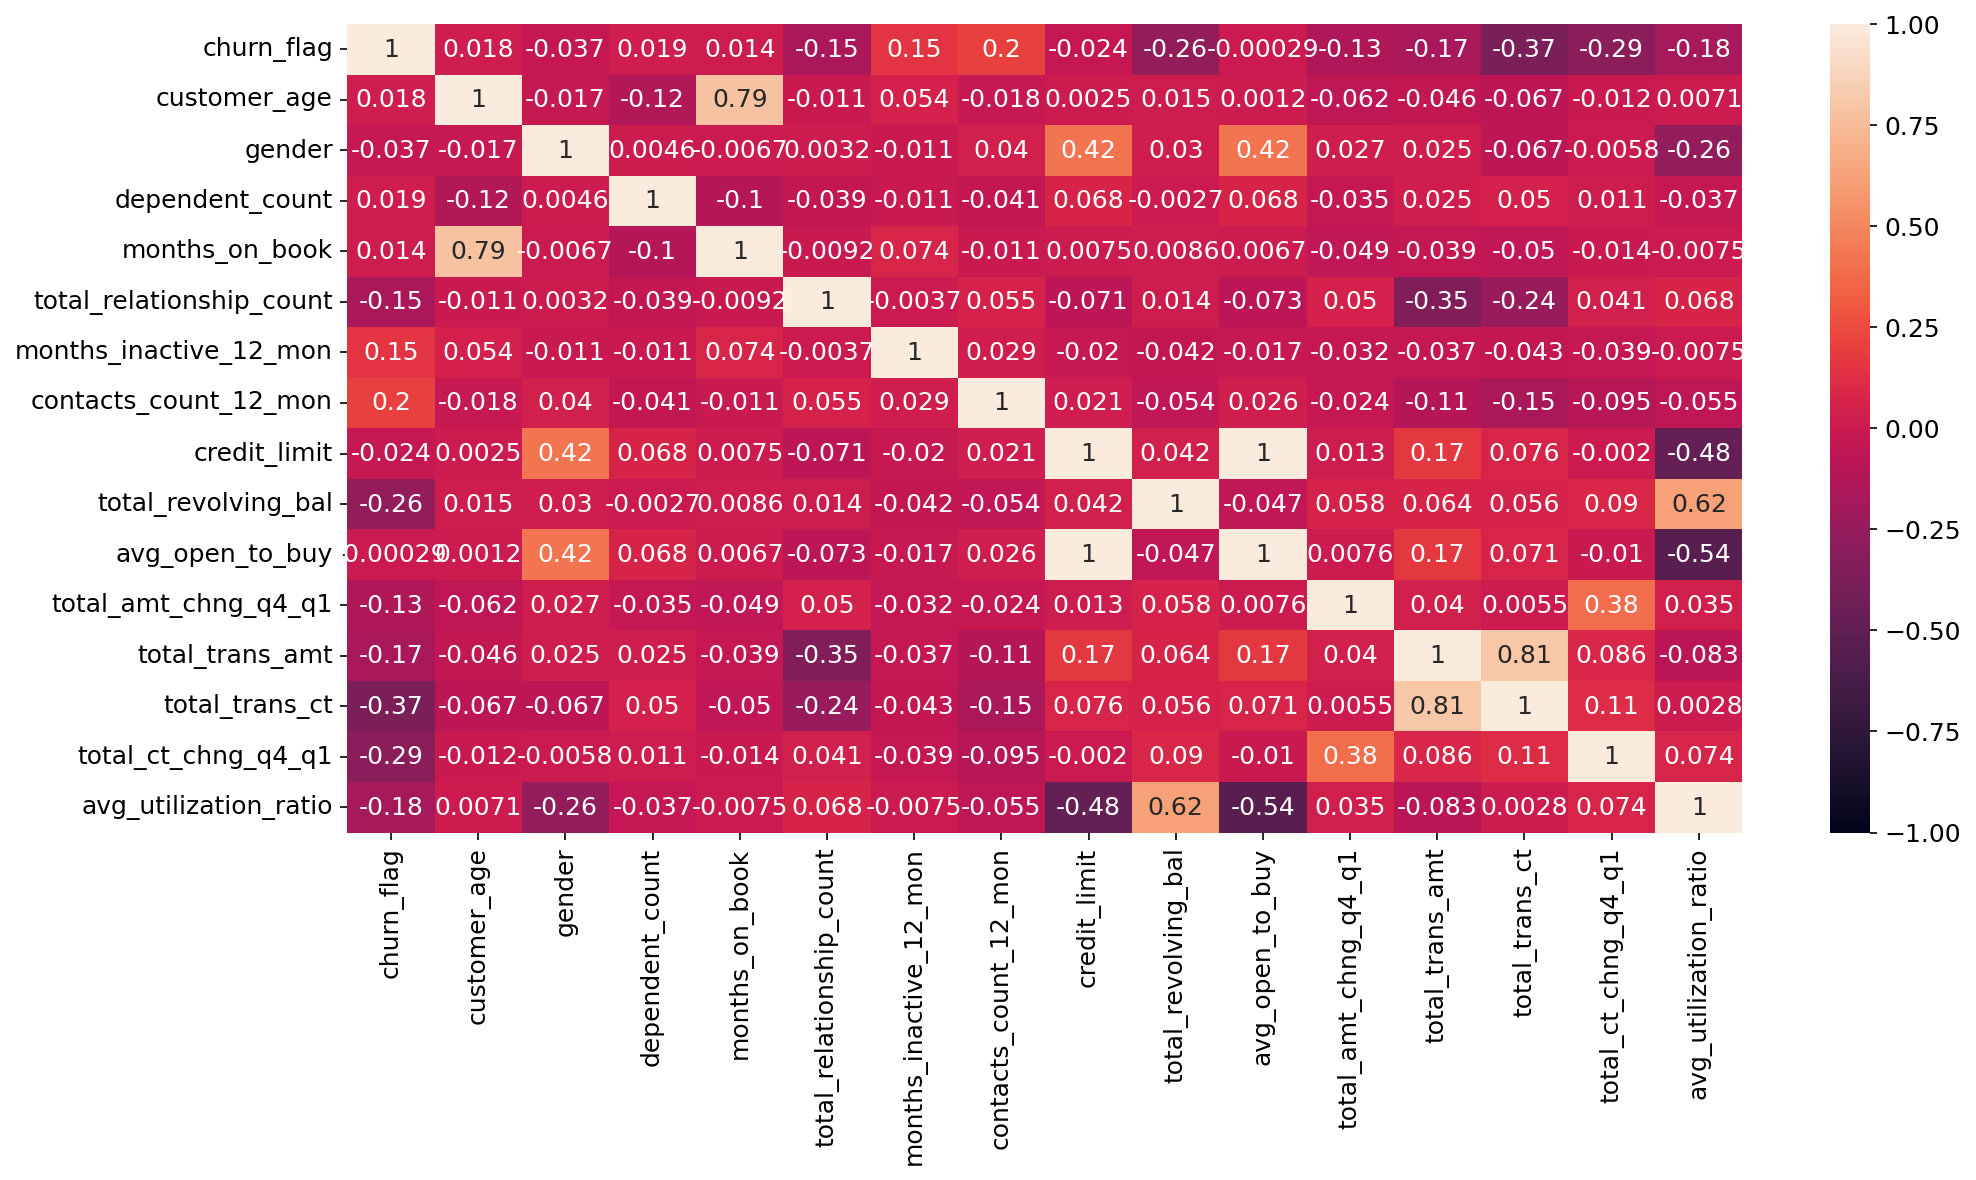

In [170]:
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()


Insights:

-   Total transaction count, total revolving balance and total count change have a moderate negative correlation with the target. This makes total sense. The less transactions a customer makes, the more he is likely to churn. Also, customers with lower revolving balances and less variation in their transaction counts are prone to churn due to inactivity.
-   Customer age and months on book are strongly positively correlated. The older a customer is, the more time he spends consuming the bank's credit card services and vice-versa. Thus, the company must focus its efforts on retaining the old loyal customers and increase the tenure of younger ones.
-   Credit limit and average utilization ratio are moderately negatively correlated. The higher the customer's credit limit, the lower the average utilization ratio.
-   Total revolving balance and average utilization ratio are strongly positively correlated. This makes sense. As a customer uses more his credit card, he will have to pay higher revolving balances.
-   Curiously, gender has a moderate positive correlation with credit limit. This may indicate that male customers tend to have higher credit limits than female ones.
-   Curiously, average open to buy and credit limit are perfectly positively correlated. This means these two variables have a strong and consistent linear relationship in the same direction. This makes sense since open to buy means the amount left in your credit card to use and limit means the used amount which hasn't been paid off yet.

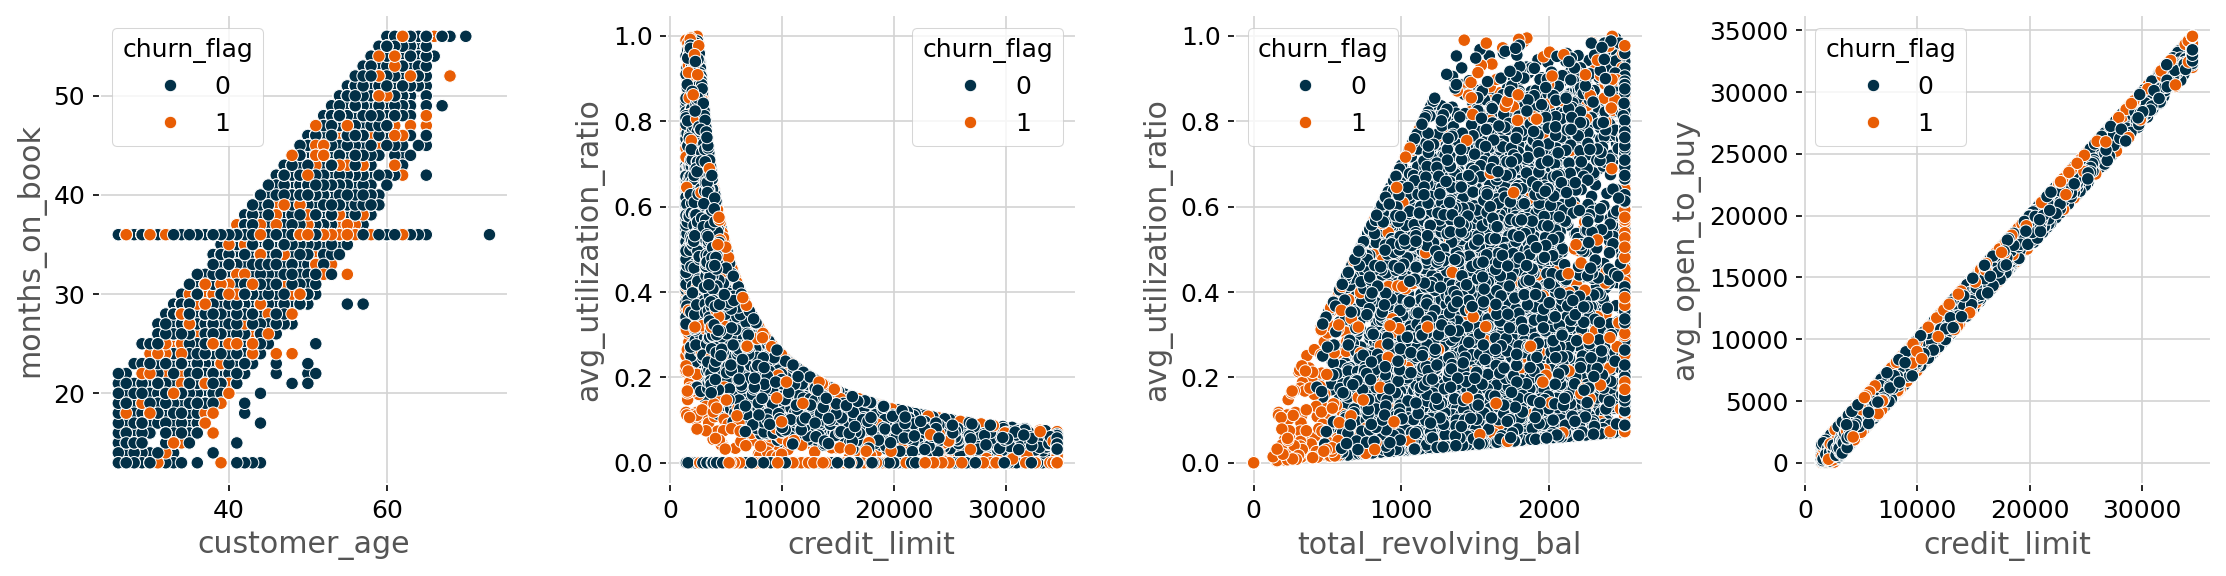

In [171]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
sns.scatterplot(data=df, x='customer_age', y='months_on_book', hue='churn_flag', ax=axes[0])
sns.scatterplot(data=df, x='credit_limit', y='avg_utilization_ratio',  hue='churn_flag', ax=axes[1])
sns.scatterplot(data=df, x='total_revolving_bal', y='avg_utilization_ratio',  hue='churn_flag', ax=axes[2])
sns.scatterplot(data=df, x='credit_limit', y='avg_open_to_buy',  hue='churn_flag', ax=axes[3])
plt.tight_layout()
plt.show()


Curiously, credit limit and average utilization ratio present an exponential decreasing relationship! This indicates that, as credit limit increases, the average utilization ratio decreases at an exponential rate. Thus, customers with higher credit limits use their credit cards less.

### Numerical features distributions by churn flag

I will look at attrited and existing customers numerical distributions below in order to see if there is any significant difference between them.

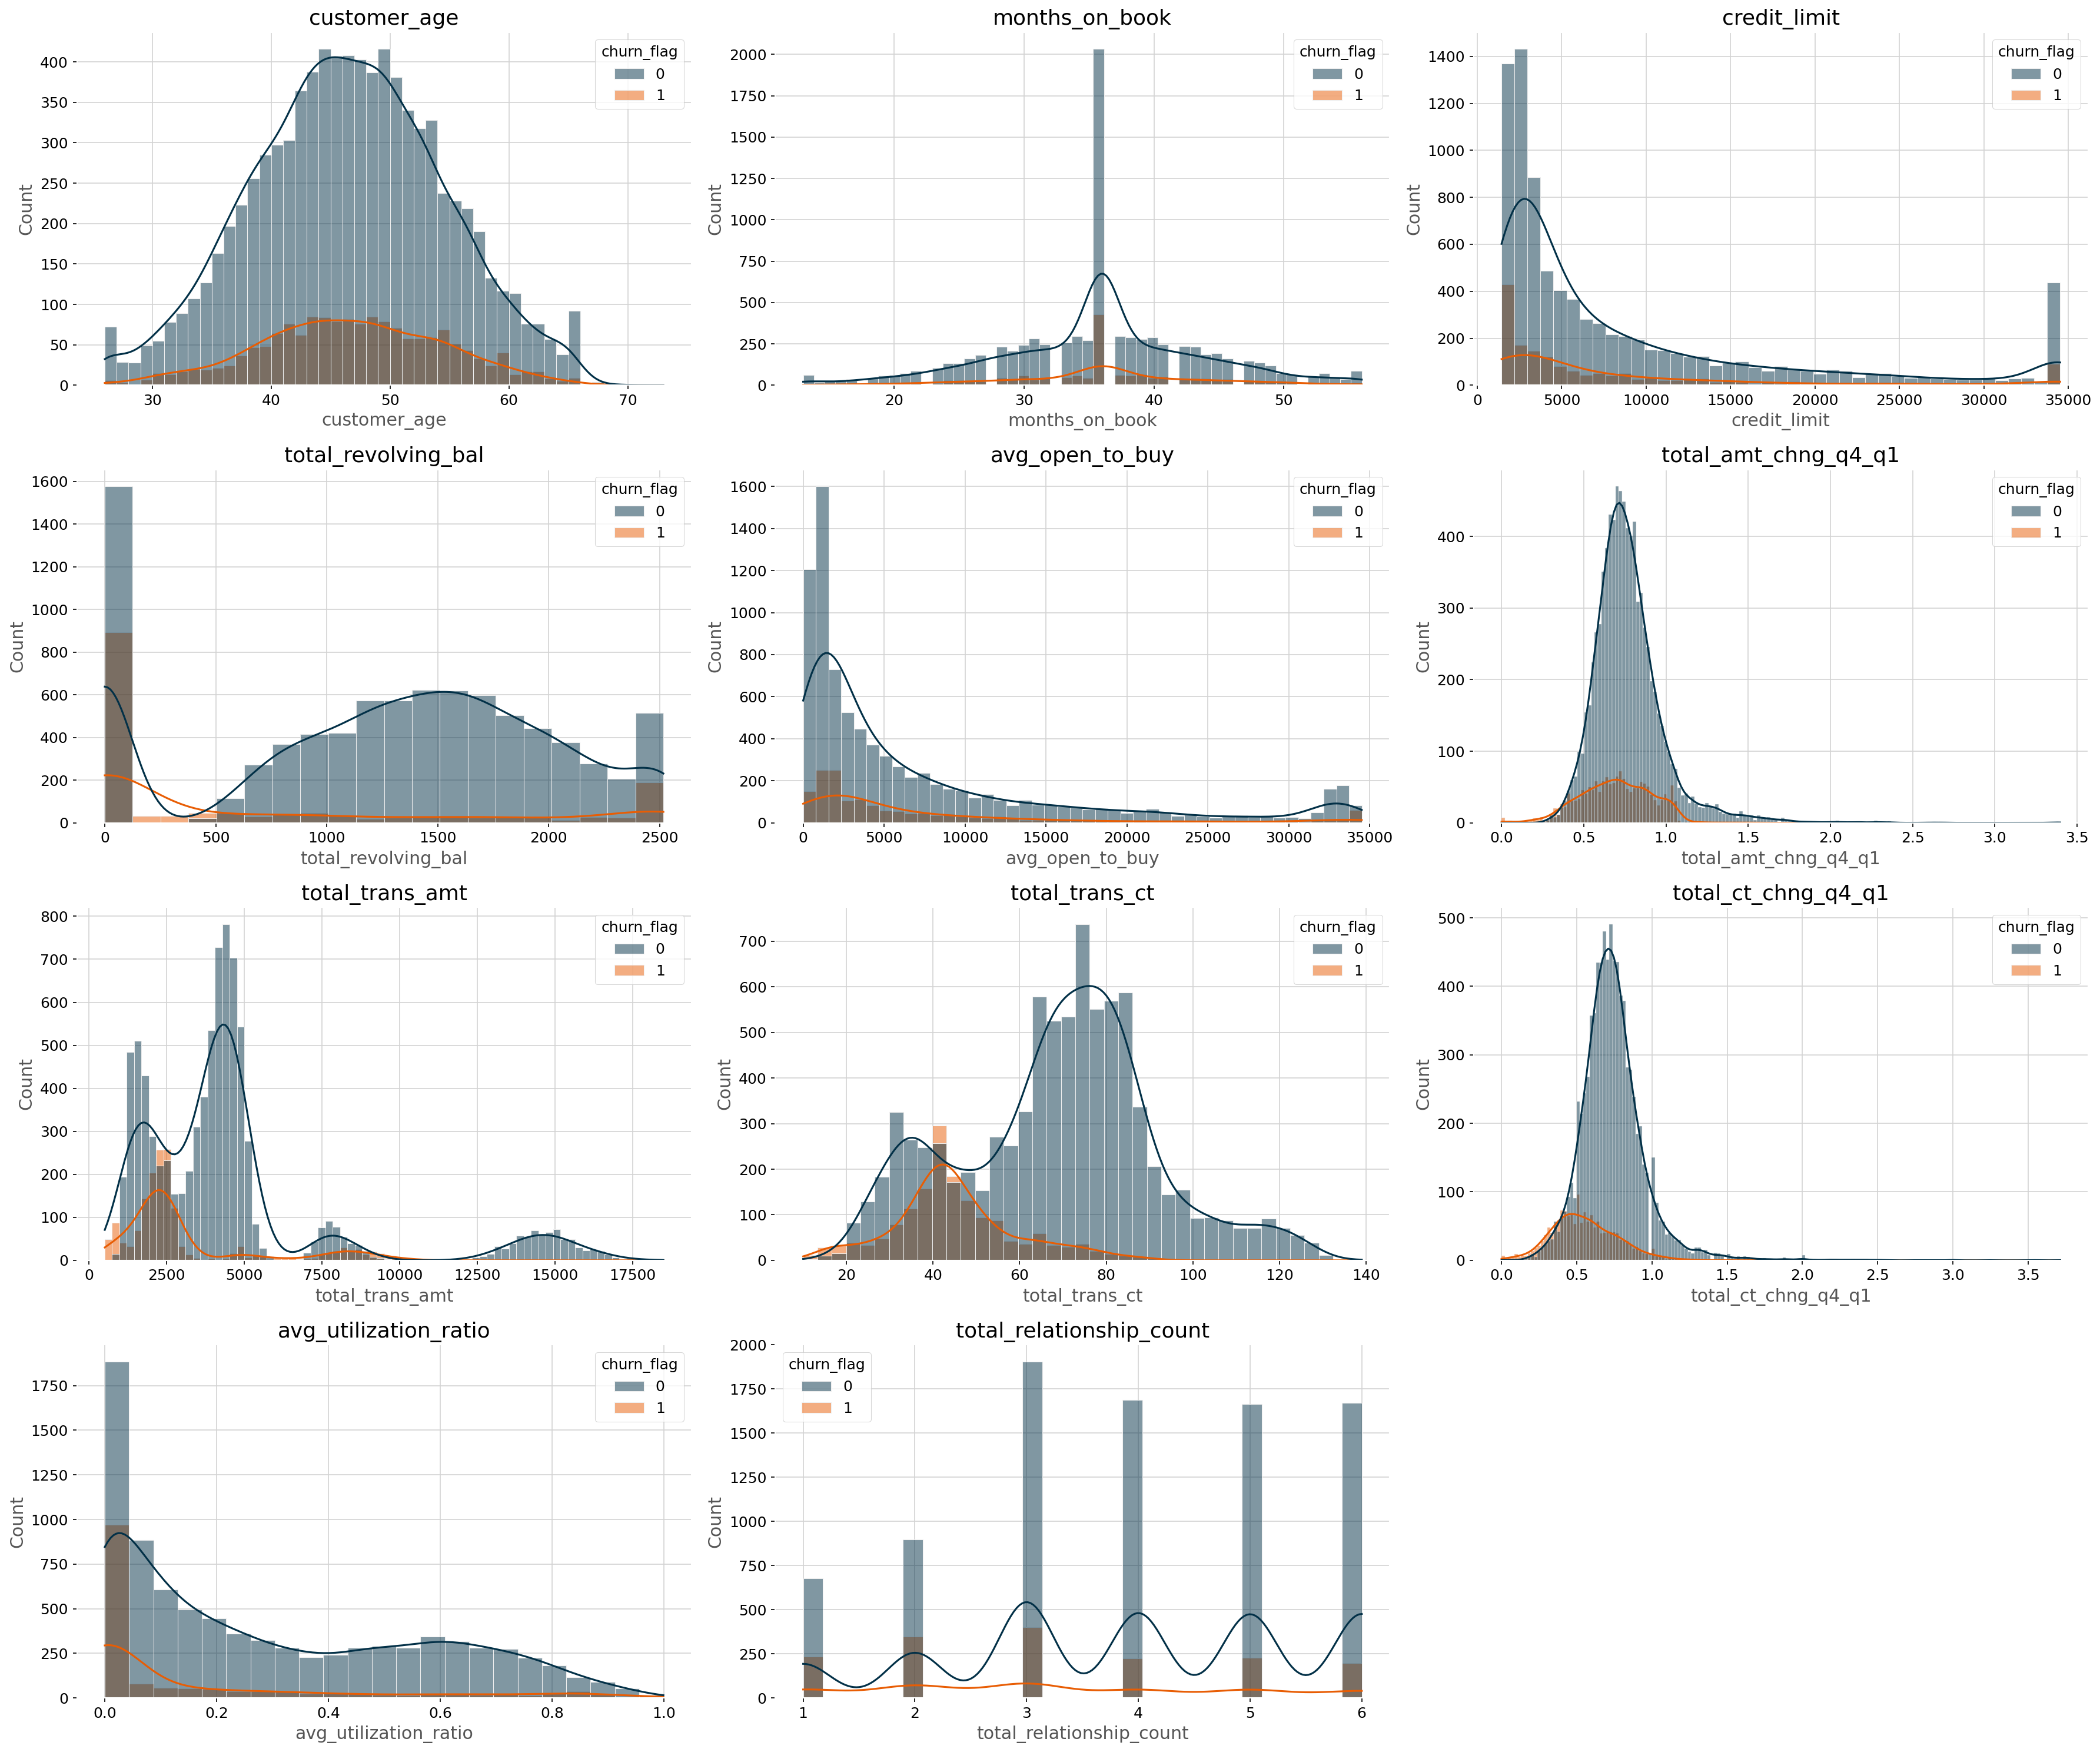

In [172]:
analysis_plots(data=df, features=numplots_features, histplot=True, kde=True, hue=target, figsize=(24, 20))

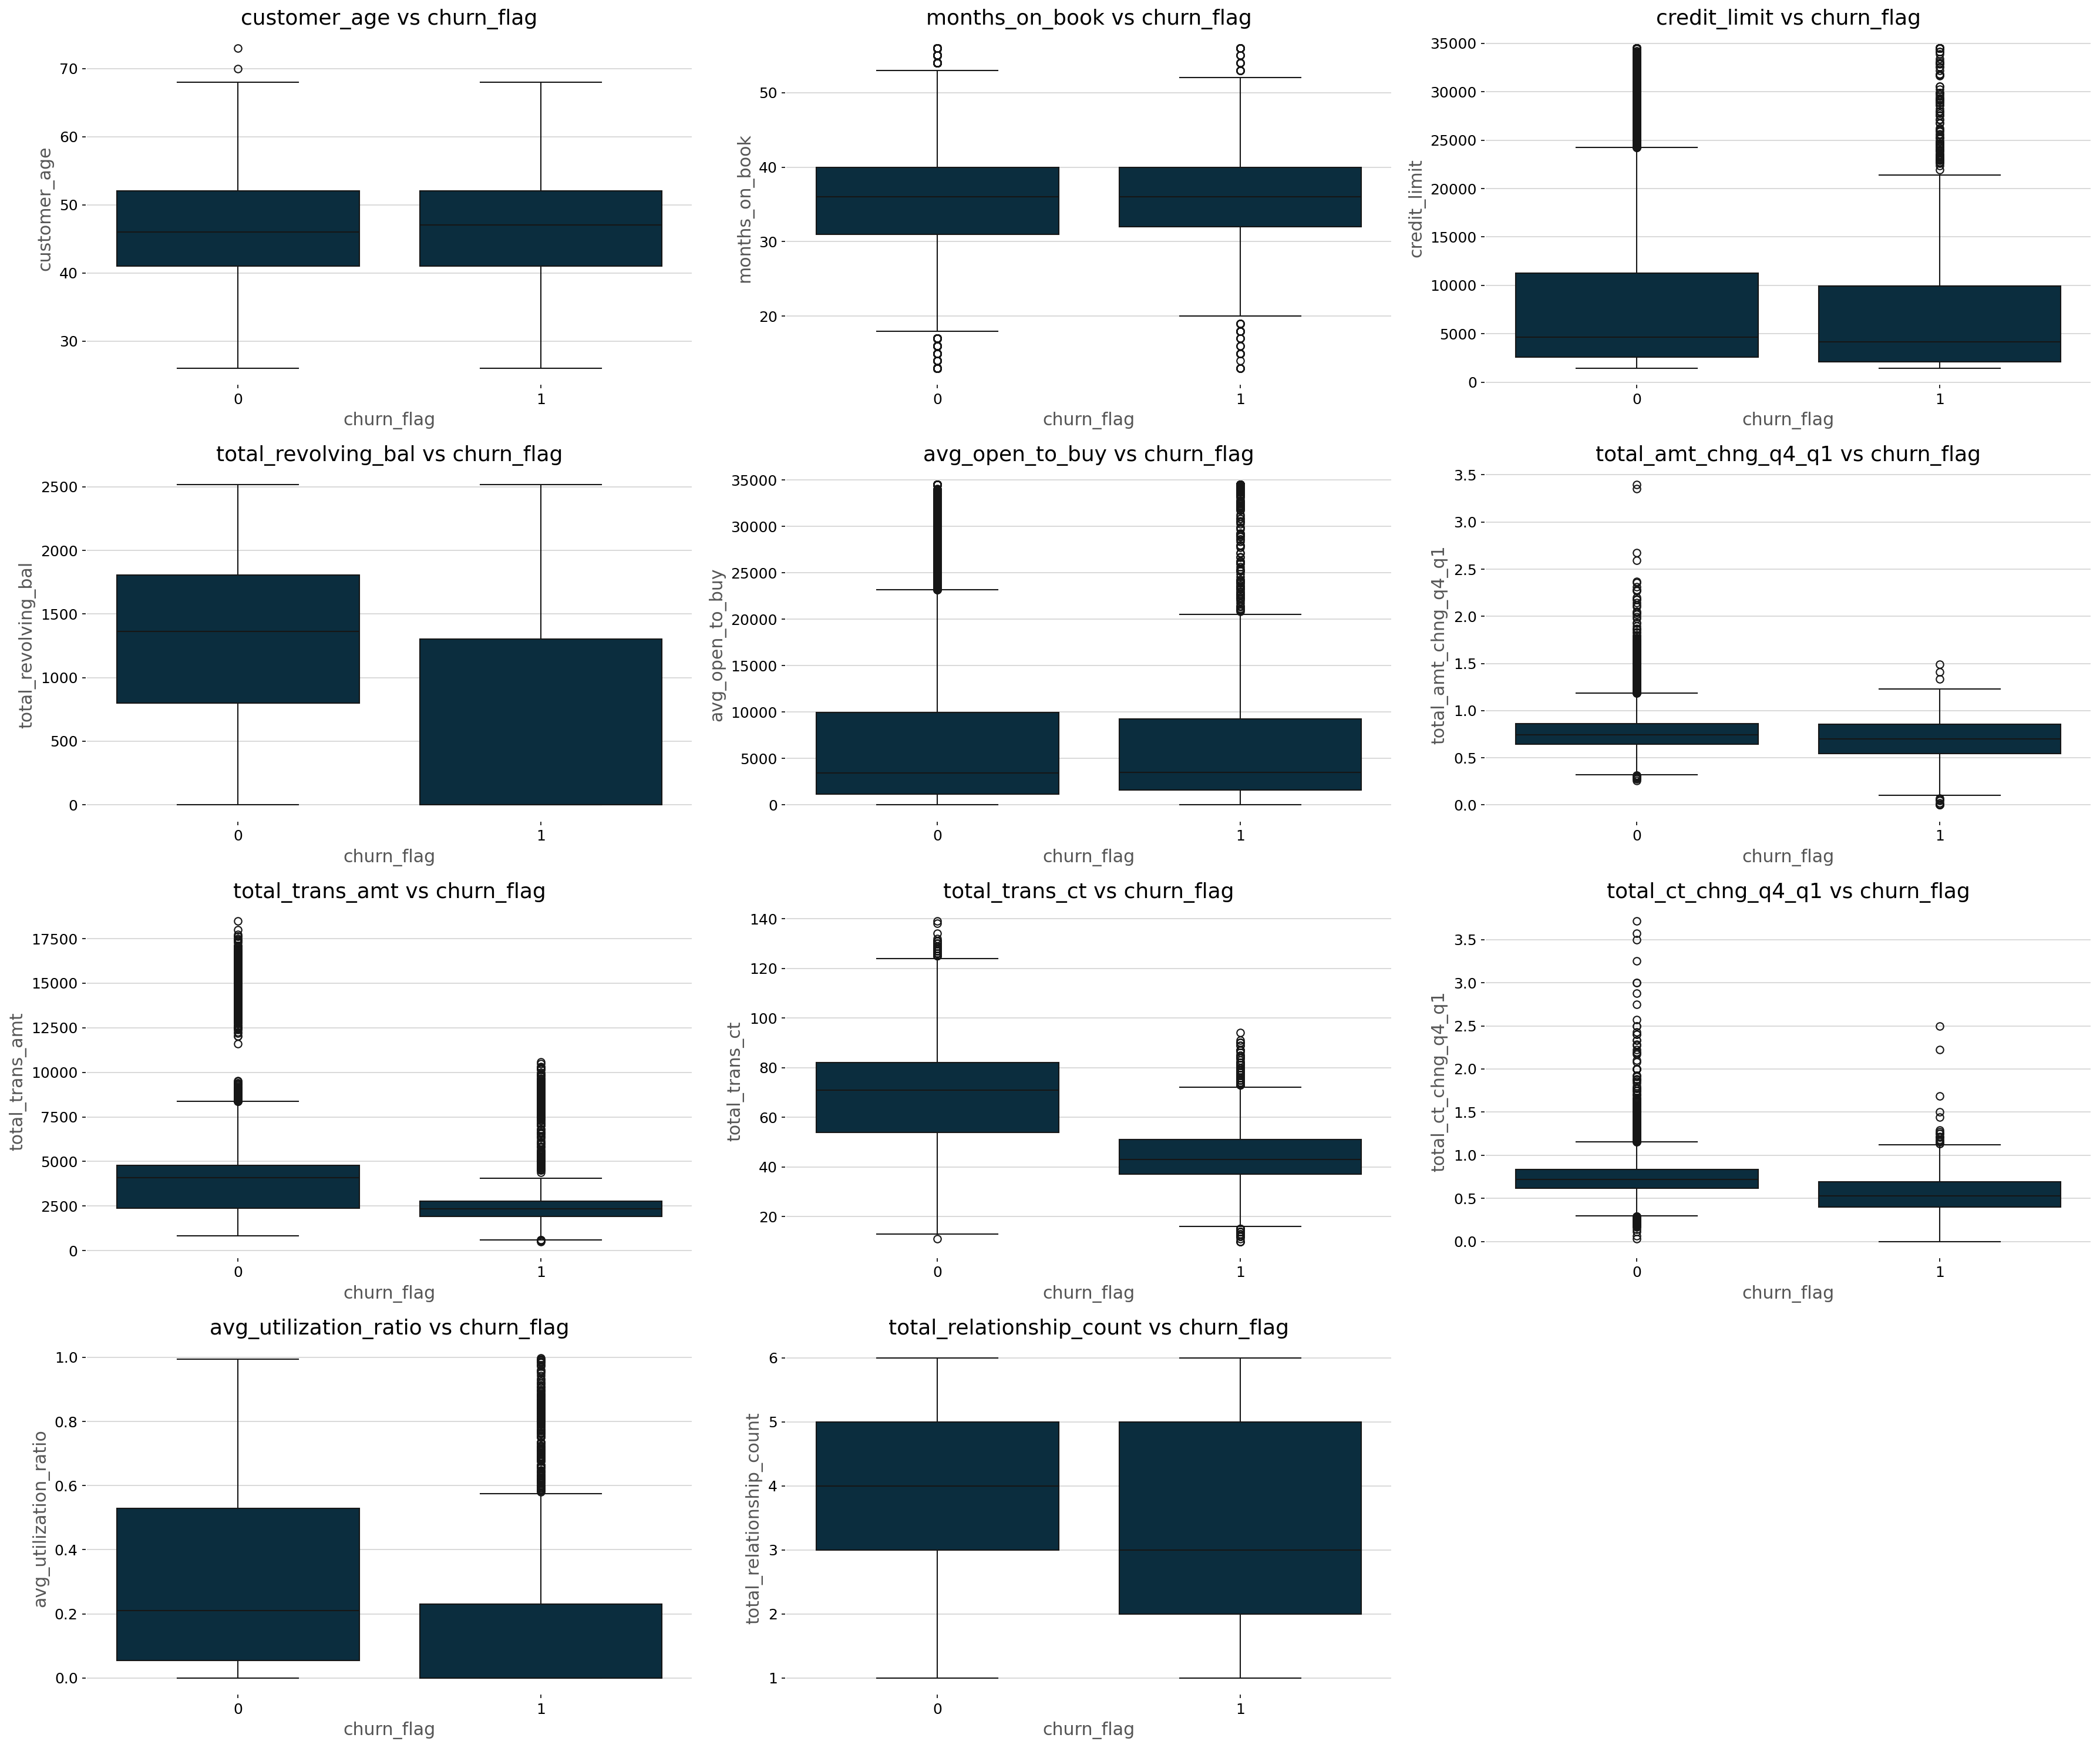

In [173]:
analysis_plots(data=df, features=numplots_features, boxplot=True, boxplot_x=target, figsize=(24, 20))


Insights:

-   Customers who churn tend to have fewer products from the bank. Attrited customers generally have between 1 and 3 products
-   Customers who churn tend to have slightly lower credit limits.
-   Customers who churn tend to have lower revolving balances, which makes sense since churners tend to use their credit cards less. Especially, a large part of them present a zero revolving balance.
-   Customers who churn tend to have lower transaction amounts, which makes total sense. When a client is about to discontinue the service, he will make fewer transactions, resulting in lower amounts in a period.
-   Customers who churn tend have lower transaction counts, which makes total sense. When a client is about to discontinue the service, he will make fewer transactions.
-   Customers who churn tend to have lower changes in their transaction counts, which makes sense since making fewer transactions will reduce the variation in counts.
-   As expected, customers who churn tend to have lower average utilization ratio. Particularly, many of them tend to have a zero utilization ratio.


### Categorical features distributions by churn rate

I will look at how the churn rate is distributed over different categorical variables categories in order to assess which are the categories with higher proportions of churners.

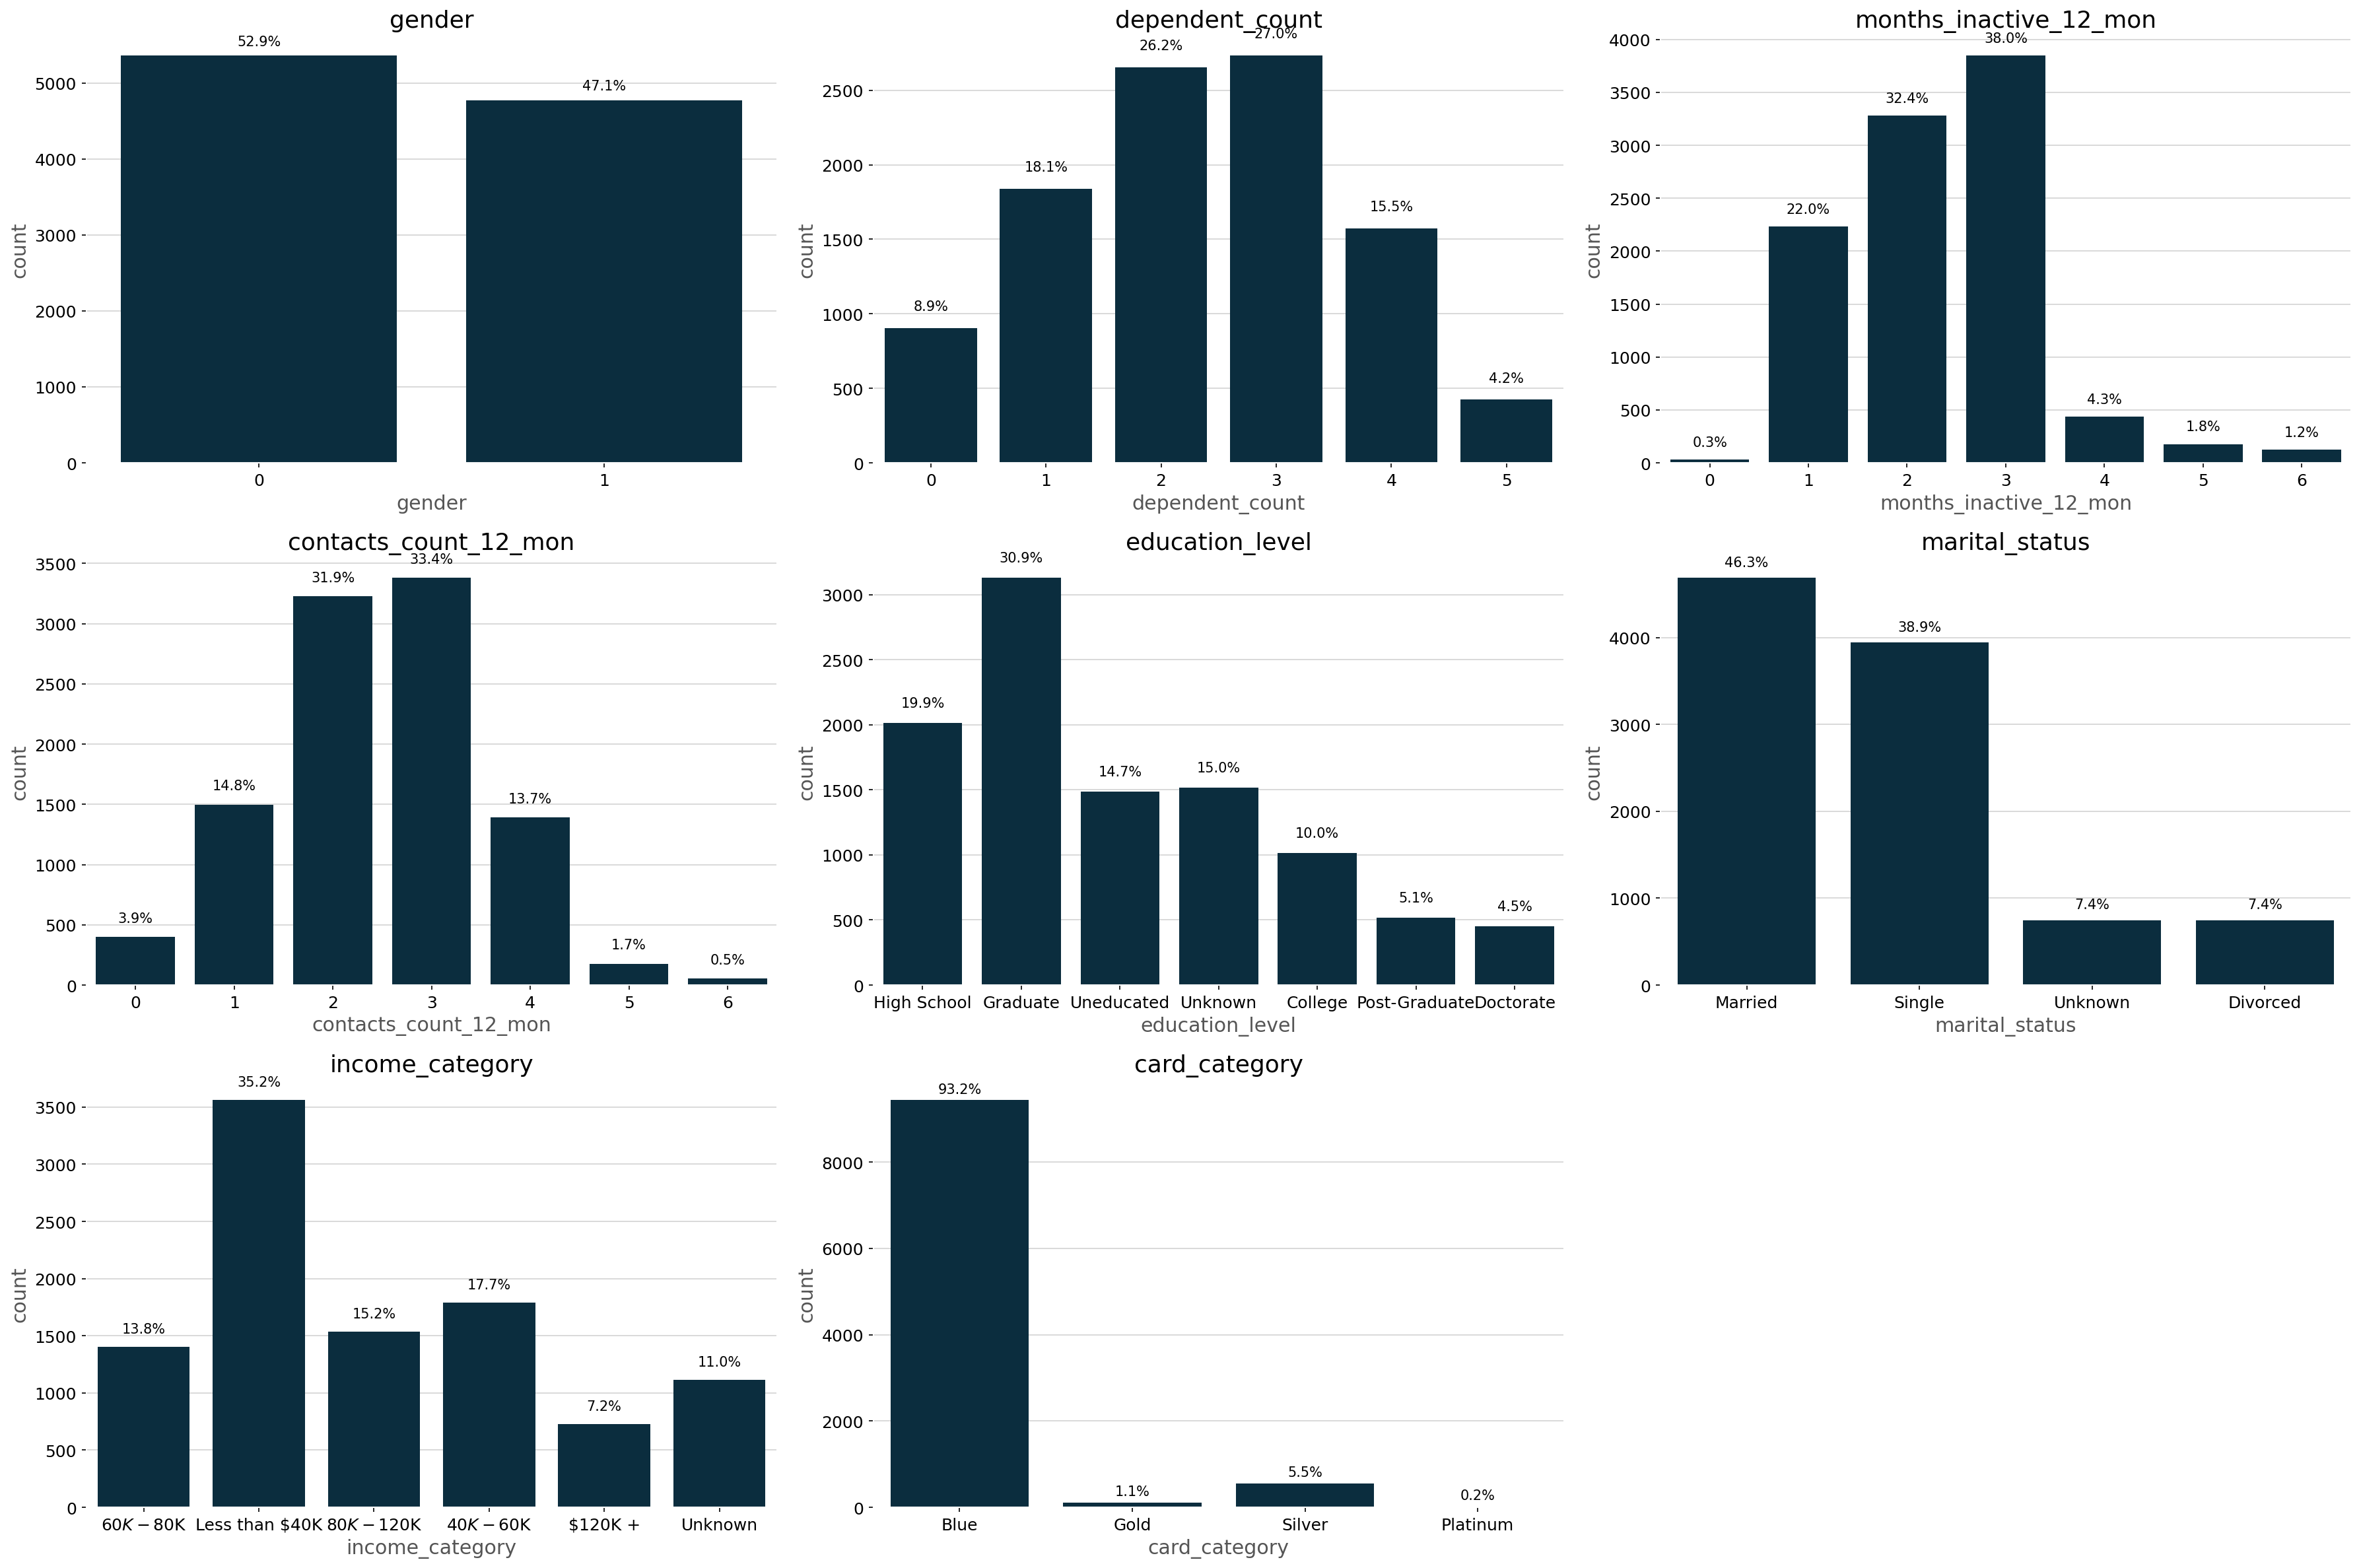

In [179]:
analysis_plots(data=df, features=barplot_features, barplot=True, figsize=(24, 16), hue=target, text_y=0.2)


Insights:

-   The churn rate consistently increases monotonically as the number of contacts with the bank rises. Especially, all customers who made six contacts churned.
-   In marital_status, the unknown category presents the highest churn rate. For education_level and income_category, it presents the second highest churn rates. 
-   Although card_category is highly imbalanced towards blue type, it is possible to see that the churn rate varies across the categories. Particularly, Platinum presents the highest churn rate. 
-   The churn rate is higher for women.
-   Surprisingly, customers who were never inactive in the last 12 months present the highest churn rate.
-   Customers with doctorate educational level present the highest churn rate among the other levels.

### EDA conclusions

**Main insights:**

-   The bank must be alert to the distribution of the average utilization ratio. Being right-skewed means that most customers have a low utilization of the service. Particularly, about 25% of them present zero utilization ratio. Therefore, the company must plan strategies to increase utilization and, consequently, revenue.
-   90% of the customers were inactive from 1 to 3 months in the last 12 months. The bank must plan strategies not only to increase the utilization ratio, but also to avoid customer inactivity.
-   75% of the customers contacted the bank at least 2 times in the last 12 months. The bank must pay attention to this and discover the reasons why customers are calling. Are they dissatisfied with the credit card service? If so, what specifically is causing their dissatisfaction?
-   Customer age and months on book are strongly positively correlated. The older a customer is, the more time he spends consuming the bank's credit card services and vice-versa. Thus, the company must focus its efforts on retaining the old loyal customers and increase the tenure of younger ones.
-   Credit limit and average utilization ratio present an exponential decreasing relationship! This indicates that, as credit limit increases, the average utilization ratio decreases at an exponential rate. Thus, customers with higher credit limits use their credit cards less.
-   Customers who churn tend to have lower credit limits, revolving balances, transaction amounts, transaction counts, changes in transaction counts, and average utilization ratios (actually, many of them present a zero utilization ratio). This makes total sense because when a client is about to discontinue the service, he will make fewer transactions, resulting in lower values of these attributes.
-   The churn rate consistently increases monotonically as the number of contacts with the bank rises. Especially, all customers who made six contacts churned. Also, customers with doctorate educational level present the highest churn rate among the other levels.